
# Errors in Numerical Differentiation


In order for the finite difference formulas derived in the previous section to be useful, we need to have some idea of the errors involved in using these formulas.  As mentioned, we are replacing $f(x)$ with its polynomial interpolant $p_n(x)$ and then taking the derivatives, so that 

$$ f'(x) = p_n'(x) + \epsilon'(x),\qquad f''(x) = p_n''(x) + \epsilon''(x).$$

We need to $\epsilon'(x)$ and $\epsilon''(x)$ to determine the errors in the formulas we derived.

First recall [the polynomial interpolation error](../InterpFit/InterpErrors) is

```{math}
:label: inter_err_a
\epsilon(x)= f(x)-p_n(x) = \frac{f^{n+1}(\xi)}{(n+1)!}\prod_{j=0}^n (x-x_j).
```

Taking the derivative of this using the product rule yields

 
```{math}
:label: errprime
\epsilon'(x) = \frac{f^{n+1}(\xi)}{(n+1)!}\left[\sum_{k=0}^n \prod_{j=0,j\neq k}^n (x-x_j)\right] + \frac{f^{n+2}(\xi)\xi'}{(n+1)!}\prod_{j=0}^n (x-x_j), 
```


where the second term arises from the fact that $\xi$ may depend on $x$.  Evaluating this at one of the gridpoints, say $x_i$, simplifies the expression considerably as all but one of the terms contain the factor $(x_i-x_i)$,


```{math}
:label: pprimeerr
\epsilon'(x_i) = \frac{f^{n+1}(\xi)}{(n+1)!}\prod_{j=0,j\neq i}^n (x_i-x_j). 
```

We can now use this expression for the errors in our first derivative finite difference formulas.  Before we do, let's derive the error formula for the second derivatives.


Taking the derivative Equation {eq}`errprime` yields

$$
\begin{align} \epsilon''(x) = & \frac{f^{n+1}(\xi)}{(n+1)!}\left[ \sum_{k=0}^n \sum_{m=0, m\neq k}^n \prod_{j=0,j\neq k,m}^n (x-x_j)\right]\\
& + \frac{f^{n+2}(\xi)\xi''+f^{n+3}(\xi)\xi'}{(n+1)!}\prod_{j=0}^n (x-x_j) \\
&+ \frac{f^{n+2}(\xi)\xi'}{(n+1)!}\left[\sum_{k=0}^n \prod_{j=0,j\neq k}^n (x-x_j)\right],\end{align}$$

Evaluating this at one of the gridpoints, say $x_i$, simplifies the expression to,


```{math}
:label: ppperr
\epsilon''(x_i) &=\frac{f^{n+1}(\xi)}{(n+1)!}\left[\sum_{m=0,m\neq i}^n \prod_{j=0, j\neq i,m} (x_i-x_j) + \sum_{k=0,k\neq i}^n \prod_{j=0, j\neq i,k} (x_i-x_j) \right] +\frac{f^{n+2}(\xi)\xi'}{(n+1)!}\prod_{j=0,j\neq i}^n (x_i-x_j),\\
&=\frac{2f^{n+1}(\xi)}{(n+1)!}\left[\sum_{k=0,k\neq i}^n \prod_{j=0, j\neq i,k} (x_i-x_j) \right] +\frac{f^{n+2}(\xi)\xi'}{(n+1)!}\prod_{j=0,j\neq i}^n (x_i-x_j).
```

This is a bit messier than the error for the first derivative Equation {eq}`pprimeerr`.  In most cases one can argue that the second term is small compared to the first as it contains one additional factor of the difference of grid points and one expects $\xi'$ to be small.

## Example: Error in the two point formulas 

In the previous section, for two points $x_0$ and $x_1=x_0+h$ we derived the forward/backwards difference formulae and we would now like to know the error in using these formulae.  Using Equation {eq}`pprimeerr` with $n=1$ we straightforwardly get

$$ \epsilon'(x_0) = \frac{f''(\xi)}{2}(-h),\quad \text{and}\quad  \epsilon'(x_1) = \frac{f''(\xi)}{2}(h),$$

noting that $\xi$ is not likely to be the same number in the two cases.  So, in summary, we now have


```{math}
:label: twopoint
\left[{\begin{array}{c}
f'(x_0) \\
f'(x_1) \\
\end{array}} \right] =
\left[{\begin{array}{c}
\frac{f(x_1)-f(x_0)}{h} \\
\frac{f(x_1)-f(x_0)}{h} \\
\end{array}} \right] +
\left[{\begin{array}{c}
  -\frac{h}{2}f''(\xi) \\
   \frac{h}{2}f''(\xi) \\
\end{array}} \right].
```


## Example: Error in the three point formulae 

In the previous section, for three points $x_0,\,x_1=x_0+h,$ and $x_2=x_0+2h,$ $x_0$ we derived finite difference formulae for first and second derivatives and we would now like to know the error in using these formulae.  Using Equation {eq}`pprimeerr` with $n=2$ we straightforwardly get the result for the first derivatives:

$$
\begin{equation}
\left[{\begin{array}{c}
f'(x_0) \\
f'(x_1) \\
f'(x_2)
\end{array}} \right] =
\left[{\begin{array}{c}
\frac{-3f(x_0)+4f(x_1)-f(x_2)}{2h} \\
\frac{f(x_2)-f(x_0)}{2h} \\
\frac{3f(x_2)-4f(x_1)+f(x_0)}{2h}
\end{array}} \right] +
\left[{\begin{array}{c}
  \frac{h^2}{3}f^{(3)}(\xi) \\
  -\frac{h^2}{6}f^{(3)}(\xi) \\\
  \frac{h^2}{3}f^{(3)}(\xi) \\
\end{array}} \right].
\end{equation}
$$

First note that the errors here are $\mathcal{O}(h^2)$ compared to Equation {eq}`twopoint` for the two-point formulae which are $\mathcal{O}(h)$.  So, assuming $h$ is small, these do indeed have a higher order accuracy.  Further, the error in the *central* difference formula is *half* that of the backward/forward differences.  As a result, the central difference formula is the one most widely used.

We now turn to the second derivative errors.  At $x_0$ Equation {eq}`ppperr` gives

$$
\begin{align}
\epsilon''(x_0) &= 2\frac{f^{(3)}(\xi)}{3!}\left[(x_0-x_1)+(x_0-x_2)\right]+\frac{f^{(4)}(\xi)\xi'}{3!}(x_0-x_1)(x_0-x_2)\\
&= -f^{(3)}(\xi) h + \frac{f^{(4)}(\xi)\xi'}{3}h^2.
\end{align}
$$

At $x_1$ we get

$$
\begin{align}
\epsilon''(x_1) &= 2\frac{f^{(3)}(\xi)}{3!}\left[(x_1-x_0)+(x_1-x_2)\right]+\frac{f^{(4)}(\xi)\xi'}{3!}(x_1-x_0)(x_1-x_2)\\
&= -\frac{f^{(4)}(\xi)\xi'}{6} h^2.
\end{align}
$$

These, together with the result at $x_2$ gives

$$
\begin{equation}
\left[{\begin{array}{c}
f''(x_0) \\
f''(x_1) \\
f''(x_2)
\end{array}} \right] =
\left[{\begin{array}{c}
\frac{f(x_0)-2f(x_1)+f(x_2)}{h^2} \\
\frac{f(x_0)-2f(x_1)+f(x_2)}{h^2} \\
\frac{f(x_0)-2f(x_1)+f(x_2)}{h^2}
\end{array}} \right] +
\left[{\begin{array}{c}
  -h f^{(3)}(\xi) \\
  -\frac{h^2}{6}f^{(4)}(\xi)\xi' \\\
  h f^{(3)}(\xi) \\
\end{array}} \right],
\end{equation}
$$

where we have dropped the higher order error terms.  Note that even through the approximation formula is the same for all 3 points, the error in this formula is much worse at the endpoints ($\mathcal{O}(h)$ versus $\mathcal{O}(h^2)$).  In homework you will see that you can also derive the central difference formula using a Taylor series expansion (including errors) about $x_1$ and then using the mean value theorem to combine the errors at the points $x_1\pm h$ at a new, also unknown, point $\eta$ to get

$$ f''(x_1) \approx \frac{f(x_0)-2f(x_1)+f(x_2)}{h^2} -\frac{h^2}{12}f^{(4)}(\eta). $$


## Stability

The central difference formula we derived

$$
f'(x_1)=\frac{f(x_2)-f(x_0)}{2h}-\frac{h^2}{6}f^{(3)}(\xi),
$$

involves two things we warned about when we talked about [roundoff errors](../ErrorsModule/RoundoffAmplification).  Namely, subtraction of two similar numbers, the $f(x_2)-f(x_0)$, and division by a small number $h$.  As a result, attempting to obtain the "exact" value of $f'(x_1)$ by taking ever smaller $h$ is **not** a numerically stable operation as we will now demonstrate.

As in our discussion of [roundoff errors](../ErrorsModule/HornersAlgorithm) let $\mathcal{fl}(.)$ denote the finite precision arithmetic on the computer, i.e.

$$
\mathcal{fl}(f(x))=f(x) + e_r(x)
$$

where $e_r$ is the roundoff error.  The error in evaluation of the central difference formula on a computer is then

$$
\begin{align}
E(h) &= \left|f'(x_1)-\mathcal{fl}\left(\frac{f(x_2)-f(x_0)}{2h} \right)\right|, \\
&= \left|-\frac{h^2}{6}f^{(3)}(\xi) + \frac{e_r(x_2)-e_r(x_0)}{2h}\right|,
\end{align}
$$

where the second term comes from the fact that we cannot evaluate the central difference exactly using finite precision arithemetic.  The roundoff errors here are unlikely to be correlated and, in particular, are as likely to be positive as negative.  We do expect it to be bounded so let's assume $|e_r(x)|<\beta$.  Putting this together, along with use of the triangle inequality gives

$$
E(h) \leq \frac{\beta}{h} + \frac{h^2}{6}|f^{(3)}(\xi)|.
$$

Note that while the truncation error (the second term) decreases as $h$ gets smaller, the roundoff error *increases* as $h$ gets smaller.  As a result, there is actually an *optimal* $h$ to minimize the error.  To find this we take the derivative of $E(h)$ and set it to zero to get

$$
\frac{dE}{dh}\approx -\frac{\beta}{h^2}+\frac{h}{3}|f^{(3)}(\xi)| = 0.
$$

Solving this for the optimal $h_{op}$ gives

$$
h_{op}=  \sqrt[3]{\frac{3 \beta}{|f^{(3)}(\xi)|}}.
$$

If $f(x)\sim 1$ we would expect the roundoff to be of order of the machine epsilon $\epsilon_r$.  For $f(x)$ not of order unity, we would expect $\beta \approx \epsilon_r |f(x)|$. So around a given $x$ we expect roughly


```{math}
:label: hop
h_{op}\approx  \sqrt[3]{\frac{3 \epsilon_r |f(x)|}{|f^{(3)}(x)|}}.
```


### Example 

Suppose we use the central difference formula to evaluate the derivative of $f(x)=e^x$.  What is the error and what is the optimal $h_{op}$?  

First note that we can work out the analytic derivative ($f'(x)=e^x$) and the third derivative here ($f^{(3)}(x)=e^x$).  In this case, {eq}`hop` then gives,

$$
h_{op}=6.7\times 10^{-6}.
$$

We can test this assertion with a short python script:

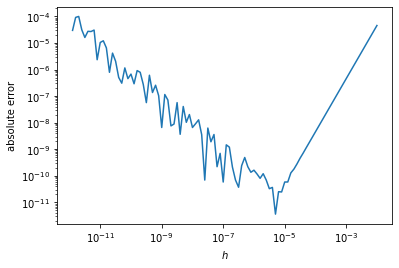

In [1]:
from matplotlib import pyplot as plt
import numpy as np
x = np.arange(2, 12, 0.1)
h = pow(10,-x)
err = abs(np.exp(1.)-(np.exp(1.+h)-np.exp(1.-h))/(2.*h))
plt.loglog(h,err)
plt.xlabel(r'$h$')
plt.ylabel(r'absolute error')
plt.show()

Indeed, we do see the minimum in the error plot is around our calculated $h_{op}$.  Interestingly, the error using $h=10^{-12}$ is comparable to the error using $h=10^{-2}$.  Also, the part of the curve dominated by roundoff errors ($h<h_{op}$) is quite noisy.  This is simply a refection of the somewhat unpreditable nature or roundoff errors.  Importantly, our arguments correctly predict the trends here.  In practise, though, one should keep in mind that roundoff errors may fluctuate an order or magnitude around these trends.

Note that similar problems arise when attempting to apply numerical differentiation to noisy data (data with stochastic noise).  A similar construction, with the errors being from stochastic noise rather than roundoff, limits how small $h$ can be before the results for the derivative become less accurate.  In this case, a presmoothing operation to reduce the noise amplitude should be applied before attempting to construct a finite difference for the derivative.